# RMS Titanic

Nobody saw the huge iceberg and the RMS Titanic sank to the bottom of the Atlantic Ocean on 15 April, 1912.
It boarded 2224 passengers on it's maiden journey and out of those 1502 died.

In this notebook I perform EDA on the passengers details and try to build a model to identify whether a specific group of people had a higher chance of survival or everybody was equally doomed.

Not gonna talk about "Rose, Jack and the Plank" 😅

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

# 1. Reading Data and Generating Statistics

In [2]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')
pid=test.PassengerId

In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Null value count
print('Train Set')
print(train[train.isnull()])
#print(train.isnull())
print('\nTest Set')
print(test.isnull().sum())

Train Set
     PassengerId  Survived  Pclass Name  Sex  Age  SibSp  Parch Ticket  Fare  \
0            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
1            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
2            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
3            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
4            NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
..           ...       ...     ...  ...  ...  ...    ...    ...    ...   ...   
886          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
887          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
888          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
889          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
890          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   

    Cabin Embarked  
0     Na

# 2. Data Cleaning

### Filling Null Values

In [7]:
#Train dataset fillna
train['Age']=train['Age'].fillna(train['Age'].median())
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

#Test datset fillna
test['Age']=test['Age'].fillna(test['Age'].median())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [8]:
#Null values count
print('Train Set')
print(train.isnull().sum())
print('\nTest Set')
print(test.isnull().sum())

Train Set
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Test Set
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


### Feature Engineering

In [9]:
#Creating new columns my merging or using previous columns
for data in [train,test]:
    data['FamilySize']=data['SibSp']+data['Parch']+1
    data['IsAlone']=1
    data['IsAlone'].loc[data['FamilySize']>1]=0
    
    #Gets the title from the name (Mr, Mrs, etc)
    data['Title'] = data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr


In [11]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Sir               1
Lady              1
Capt              1
Jonkheer          1
Don               1
Ms                1
Mme               1
the Countess      1
Name: Title, dtype: int64

In [12]:
#Too many unknown titles are there
#Cleaning the 'Title column to just include [Mr, Mrs, Miss, Master, Misc]'
#Misc contains all the unknown and gender neutral titles

#Replacing known titles
train['Title']=train['Title'].replace('Ms','Miss')
train['Title']=train['Title'].replace('Mlle','Miss')
train['Title']=train['Title'].replace('the Countess','Mrs')
train['Title']=train['Title'].replace('Mme','Mrs')

test['Title']=test['Title'].replace('Dona','Mrs')
test['Title']=test['Title'].replace('Ms','Miss')

#Replacing by misc
names=(train['Title'].value_counts() < 10)
train['Title']=train['Title'].apply(lambda x: 'Misc' if names.loc[x] == True else x)
names=(test['Title'].value_counts() < 10)
test['Title']=test['Title'].apply(lambda x: 'Misc' if names.loc[x] == True else x)

print('Train Set\n',train['Title'].value_counts())
print('\nTest Set\n',test['Title'].value_counts())

Train Set
 Mr        517
Miss      185
Mrs       127
Master     40
Misc       22
Name: Title, dtype: int64

Test Set
 Mr        240
Miss       79
Mrs        73
Master     21
Misc        5
Name: Title, dtype: int64


In [13]:
#Drop columns
columns=['PassengerId','Cabin','Ticket','Name']
train=train.drop(columns,axis=1)
test=test.drop(columns,axis=1)

### Categorical Encoding

In [14]:
#Converting categorical columns into numerical columns using LabelEncoder
#LabelEncoder gives each unique str/char a numerical value starting from 0 
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
for data in [train,test]:
    data['Sex']=label.fit_transform(data['Sex'])            # 0:Female, 1:Male
    data['Embarked']=label.fit_transform(data['Embarked'])  # 0:C , 1:Q 2:S
    data['Title']=label.fit_transform(data['Title'])        # 0:Master 1:Misc 2:Miss, 3:Mr, 4:Mrs
    
    data['Age']=data['Age'].astype('int64')
      
train.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,1,22,1,0,7.2500,2,2,0,3
1,1,1,0,38,1,0,71.2833,0,2,0,4
2,1,3,0,26,0,0,7.9250,2,1,1,2
3,1,1,0,35,1,0,53.1000,2,2,0,4
4,0,3,1,35,0,0,8.0500,2,1,1,3


# 3. EDA and Visualization

### Statistics

In [15]:
#Percentage Survived for each category
target=['Survived']
selected=['Sex','Pclass','Embarked','Title','SibSp','Parch','FamilySize','IsAlone']
for x in selected:
    print('Survival Percentage By',x)
    print(train[[x, target[0]]].groupby(x,as_index=False).mean(),'\n')
        
# Sex - 0: Female, 1: Male
# Embarked - 0: C, 1: Q, 2: S
# Title - 0: Master, 1: Misc, 2. Miss, 3: Mr, 4: Mrs
# IsAlone - 0:No, 1: Yes

Survival Percentage By Sex
   Sex  Survived
0    0  0.742038
1    1  0.188908 

Survival Percentage By Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363 

Survival Percentage By Embarked
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009 

Survival Percentage By Title
   Title  Survived
0      0  0.575000
1      1  0.318182
2      2  0.702703
3      3  0.156673
4      4  0.795276 

Survival Percentage By SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000 

Survival Percentage By Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000 

Survival Percentage By FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.2000

### Visualization

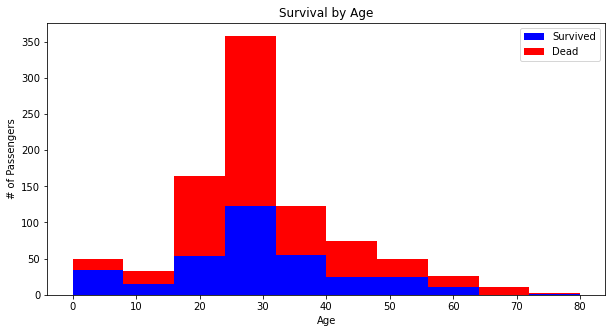

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#Shows the ratio of survived:dead passengers according to age
plt.figure(figsize=(10,5))
plt.hist(x=[train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], stacked=True, color = ['b','r'],label = ['Survived','Dead'])
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

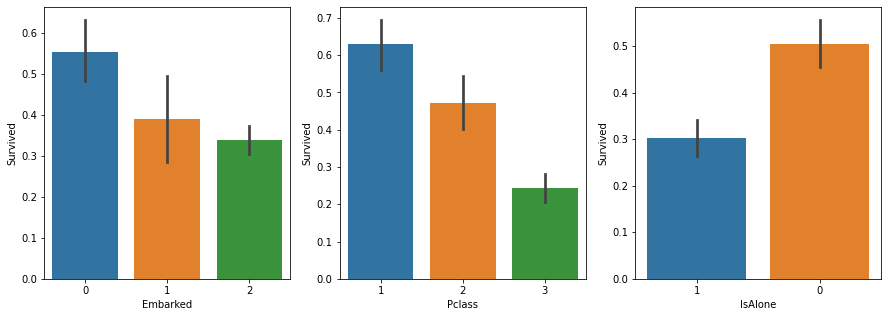

In [17]:
#Shows the percent Survival according to each Embarkment, Class and whether the passenger is alone or not
fig,ax=plt.subplots(1, 3,figsize=(15,5))
sns.barplot(x='Embarked',y='Survived',data=train,ax=ax[0])
sns.barplot(x='Pclass',y='Survived',order=[1,2,3],data=train,ax=ax[1])
sns.barplot(x='IsAlone',y='Survived',order=[1,0],data=train,ax=ax[2])

* More passengers embarking from Cherbourg survived than Queenstown and Southampton.
* More passengers from Class 1 survived.
* More passengers with thier families aboard were saved.

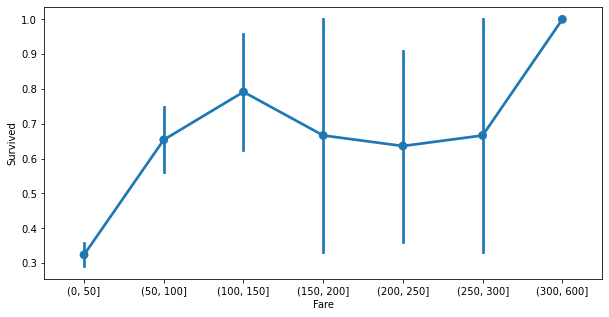

In [18]:
#Shows the survival of Passengers according to thier ticket price
df=train.copy()
df['Fare'] = pd.cut(df['Fare'], bins=[0, 50, 100, 150, 200, 250, 300,600])
plt.figure(figsize=(10,5))
sns.pointplot(x='Fare',y='Survived', data=df)

* Passengers with the most expensive ticket survived

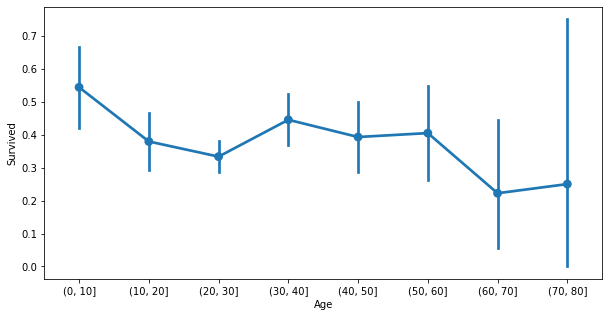

In [19]:
#Shows the survival of Passengers according to thier age
df['Age'] = pd.cut(df['Age'], bins=[0,10,20,30,40,50,60,70,80])
plt.figure(figsize=(10,5))
sns.pointplot(x='Age',y='Survived', data=df)

* The younger passengers had a higher survival rate

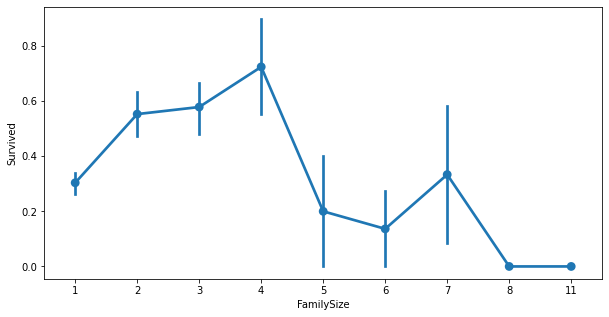

In [20]:
#Survivals according to family size
plt.figure(figsize=(10,5))
sns.pointplot(x='FamilySize', y='Survived',data=train)

* More passengers with 4 family members were rescued.
* Survival of passengers with more than 4 family members was significantly lower.

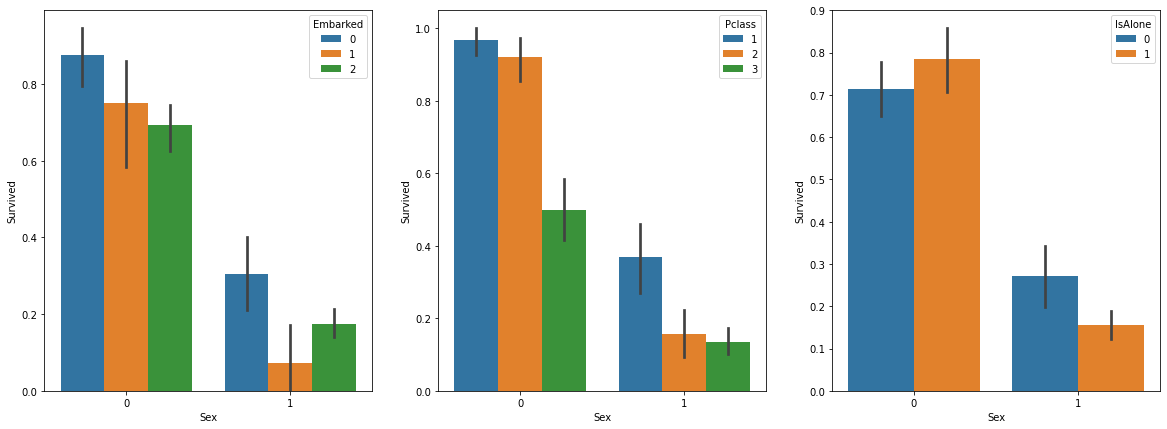

In [21]:
#Survival of each sex on the basis of embarkment, class and whether the passenger is alone or not
fig,ax=plt.subplots(1,3,figsize=(20,7))
sns.barplot(x='Sex',y='Survived',hue='Embarked',data=train,ax=ax[0])
sns.barplot(x='Sex',y='Survived',hue ='Pclass',data=train,ax=ax[1])
sns.barplot(x='Sex',y='Survived',hue='IsAlone',data=train,ax=ax[2])

* Female survival rate is significantly higher than the male survival rate in each scenario

# 4. Model Data

In [22]:
#Selecting the independent and dependent variables
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

target=train['Survived']
train.drop(['Survived'],axis=1, inplace=True)

In [23]:
#Training on different models
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=1, stratify=target)

print('Mean Absolute Errors:')

#RandomForestClassifier
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)
model.fit(X_train, y_train)
predict = model.predict(X_val)
print('Random Forrest: ' + str(mean_absolute_error(predict, y_val)))

#XGBoost
model = XGBRegressor(learning_rate=0.01, n_estimators=3460, max_depth=3, min_child_weight=0,
                        gamma=0, subsample=0.7,colsample_bytree=0.7,objective='reg:squarederror',
                        nthread=-1,scale_pos_weight=1, seed=27, reg_alpha=0.00006)
model.fit(X_train, y_train)
predict = model.predict(X_val)
print('XGBoost: ' + str(mean_absolute_error(predict, y_val)))

#LassoCV
model = LassoCV(max_iter=1e7,  random_state=14, cv=10)
model.fit(X_train, y_train)
predict = model.predict(X_val)
print('Lasso: ' + str(mean_absolute_error(predict, y_val)))

# GradientBoosting   
model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=5)
model.fit(X_train, y_train)
predict = model.predict(X_val)
print('GradientBoosting: ' + str(mean_absolute_error(predict, y_val)))

Mean Absolute Errors:
Random Forrest: 0.16201117318435754
XGBoost: 0.24234957202186796
Lasso: 0.2992625769625205
GradientBoosting: 0.22985702868106164


* We get the best MAE value with Random Forrest Classifier
* This shows that Regressor Models are not suitable for these kind of problems(Classification) as all the regressor models give very high value of MAE.

# 5. Prediction

Random Forest MAE: 0.16201117318435754
Out of Bag Score: 0.8188
Training accuracy:  0.8230337078651685
Testing accuracy:  0.8379888268156425

Confusion Matrix

[[True Positive    False Positive]
[False Negative    True Negative]]

[[100  10]
 [ 19  50]]

ROC AUC on evaluation set 0.8168642951251647


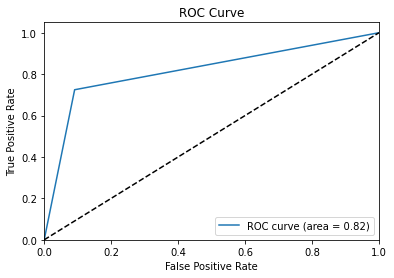

In [24]:
#Predicting on the best model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve,auc, confusion_matrix, classification_report
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

#RandomForestClassifier
model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                           criterion='gini', max_depth=4, max_features='auto',
                           max_leaf_nodes=5, max_samples=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=15,
                           min_weight_fraction_leaf=0.0, n_estimators=350,
                           n_jobs=None, oob_score=True, random_state=1, verbose=0,
                           warm_start=False)
model.fit(X_train, y_train)
predict = model.predict(X_val)
print('Random Forest MAE: ' + str(mean_absolute_error(predict, y_val)))
print("Out of Bag Score: %.4f" % model.oob_score_)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_val)

# Building the ROC Curve and Confusion Matrix
print("Training accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing accuracy: ", accuracy_score(y_val, y_pred_test))
print("\nConfusion Matrix\n")
print('[[True Positive    False Positive]\n[False Negative    True Negative]]\n')
print(confusion_matrix(y_val, y_pred_test))

fpr, tpr, _ = roc_curve(y_val, y_pred_test)
roc_auc = auc(fpr, tpr)
print("\nROC AUC on evaluation set",roc_auc )

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
#Prediction
prediction=model.predict(test)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# 6. Submission

In [26]:
output = pd.DataFrame({'PassengerId': pid, 'Survived': prediction})
output.to_csv('my_submission.csv', index=False)
print("Submission successfully saved!")

Submission successfully saved!


# Conclusion
* Females had better chance of survival in comparison to males.
* Younger passengers had better chance of survival than the older ones.
* Loners had less chance of survival.
* More Class 1 passengers survived comparitively.

### This gives an idea as to which group had better chances of survival in the tragedy.

#### Completely unrelated thought from the notebook: "Jack could have been saved if Rose scooted just a little bit on that plank!" 😂

# Thank You 🙏